In [ ]:
import math
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import mplcursors
import sys

BASE_PATH = Path.cwd().parent
sys.path.append(str(BASE_PATH))

from model.sample_ballots import get_data, get_positions, fit_gmm, get_samples

In [ ]:
N_VOTERS = 1000 #100000 # Rough size of Bristol constituency

PARTIES = ["Cons", "Lab", "LibDem", "SNP", "Plaid", "Green", "Reform"]
EMISSION_DIST = [0.16, 0.18, 0.12, 0.03, 0.03, 0.15, 0.33] # from ipsos voting intention opinion poll 06/01/26 (other 6% was split evenly between SNP & Plaid)
PARTY_IDS = [1101, 1102, 1104, 1105, 1106, 1107, 1110]
ELECTION_YEAR = 2024
ATTRIBUTES = ["lrecon", "galtan"]

df = get_data(BASE_PATH, PARTY_IDS)
party_positions = get_positions(df, ATTRIBUTES)
gmm = fit_gmm(party_positions, PARTIES, EMISSION_DIST)
sample_points, sample_cluster_labels, sample_ballots = get_samples(gmm, party_positions, N_VOTERS)

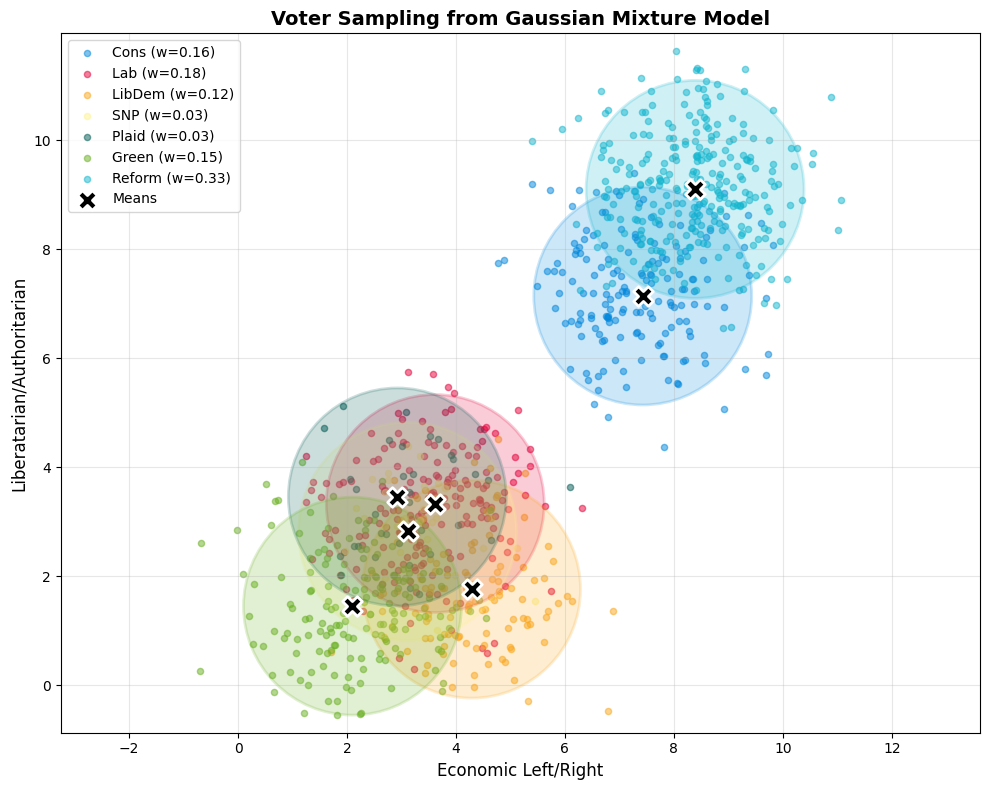

In [3]:
# Create visualization
fig, ax = plt.subplots(figsize=(10, 8))

# Plot samples colored by component
colors = ["#0087DC", "#E4003B", "#FAA61A", "#FDF38E", "#005B54", "#6AB023", "#12B6CF"]
scatter_plots = []

for i in range(len(PARTIES)):
    mask = sample_cluster_labels == i
    scatter = ax.scatter(sample_points[mask, 0], sample_points[mask, 1], 
              c=colors[i], alpha=0.5, s=20, 
              label=f'{PARTIES[i]} (w={gmm.weights_[i]:.2f})')
    scatter_plots.append((scatter, mask))

# Plot means
ax.scatter(gmm.means_[:, 0], gmm.means_[:, 1], 
          c='black', s=200, marker='X', 
          edgecolors='white', linewidths=2,
          label='Means', zorder=5)

# Draw confidence circles (2 standard deviations)
for i in range(len(PARTIES)):
    radius = 2 * np.sqrt(gmm.covariances_[i])  # 2 std devs
    
    circle = Circle(gmm.means_[i], radius,
                   facecolor=colors[i], alpha=0.2, 
                   edgecolor=colors[i], linewidth=2)
    ax.add_patch(circle)

# Create annotation for hover
annot = ax.annotate("", xy=(0,0), xytext=(20,20), textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w", alpha=0.9),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

# Hover function
def on_hover(event):
    if event.inaxes == ax:
        # Check each scatter plot
        for i, scatter in enumerate(scatter_plots):
            cont, ind = scatter.contains(event)
            if cont:
                # Get the index in the full samples array
                mask = sample_cluster_labels == i
                indices = np.where(mask)[0]
                idx = indices[ind["ind"][0]]
                
                # Update annotation
                x, y = sample_points[idx]
                annot.xy = (x, y)
                text = f'{PARTIES[i]} \nPosition: ({x:.2f}, {y:.2f})\nValue: {sample_ballots[idx]}'
                annot.set_text(text)
                annot.set_visible(True)
                fig.canvas.draw_idle()
                return
        
        # If not hovering over any point, hide annotation
        if annot.get_visible():
            annot.set_visible(False)
            fig.canvas.draw_idle()

# Connect the hover event
fig.canvas.mpl_connect("motion_notify_event", on_hover)

ax.set_xlabel('Economic Left/Right', fontsize=12)
ax.set_ylabel('Liberatarian/Authoritarian', fontsize=12)
ax.set_title('Voter Sampling from Gaussian Mixture Model', 
             fontsize=14, fontweight='bold')
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)
ax.axis('equal')

plt.tight_layout()
plt.show()

In [4]:
print(sample_ballots)

[[6, 0, 1, 4, 3, 2, 5], [0, 6, 1, 4, 3, 2, 5], [0, 6, 1, 4, 3, 2, 5], [0, 6, 1, 4, 2, 3, 5], [0, 6, 1, 4, 2, 3, 5], [0, 6, 1, 4, 3, 2, 5], [0, 6, 1, 4, 2, 3, 5], [0, 6, 1, 2, 4, 3, 5], [0, 6, 1, 4, 3, 2, 5], [6, 0, 1, 4, 3, 2, 5], [0, 6, 1, 4, 3, 2, 5], [0, 1, 4, 2, 3, 6, 5], [0, 6, 1, 4, 3, 2, 5], [6, 0, 1, 4, 3, 2, 5], [0, 6, 1, 4, 3, 2, 5], [0, 1, 6, 4, 3, 2, 5], [0, 6, 1, 4, 3, 2, 5], [0, 6, 1, 4, 3, 2, 5], [0, 6, 1, 4, 3, 2, 5], [0, 6, 1, 4, 3, 2, 5], [0, 6, 1, 4, 3, 2, 5], [0, 6, 1, 4, 3, 2, 5], [0, 6, 1, 4, 3, 2, 5], [0, 6, 1, 4, 3, 2, 5], [0, 6, 1, 4, 3, 2, 5], [0, 6, 1, 4, 3, 2, 5], [0, 1, 6, 4, 2, 3, 5], [0, 6, 1, 4, 3, 2, 5], [0, 6, 1, 4, 3, 2, 5], [0, 6, 1, 4, 3, 2, 5], [0, 6, 1, 4, 3, 2, 5], [0, 6, 1, 2, 4, 3, 5], [0, 6, 1, 4, 2, 3, 5], [0, 6, 1, 4, 3, 2, 5], [0, 6, 1, 4, 3, 2, 5], [0, 6, 1, 4, 3, 2, 5], [0, 6, 1, 2, 4, 3, 5], [6, 0, 1, 4, 3, 2, 5], [0, 6, 1, 4, 2, 3, 5], [0, 6, 1, 4, 3, 2, 5], [0, 6, 1, 4, 3, 2, 5], [0, 6, 1, 4, 3, 2, 5], [0, 6, 1, 4, 3, 2, 5], [6, 0, 1, 